# Model Calculation BMR Daily Calories Needs & Food Prefensi User

## Requirements Python
**Python Version: 3.9**

**Library Python**
| **Package**                  | **Version**  |
|------------------------------|--------------|
| matplotlib                   | 3.9.2        |
| numpy                        | 1.24.3       |
| pandas                       | 2.2.3        |
| pip                          | 24.3.1       |
| seaborn                      | 0.13.2       |
| tensorflow                   | 2.10.1       |
| tensorflow-estimator         | 2.9.0        |
| tensorflow-io-gcs-filesystem | 0.31.0       |
| termcolor                    | 2.5.0        |
| scikit-learn                 | 1.2.2        |
| scikit-learn-extra           | 0.2.0        |
| regex                        | 2023.9.0     |

## Import Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df_cleaned = pd.read_csv('../data/Diet Plan Recommendation/cleaned_dataset.csv')
df_combined = pd.read_csv('../data/combine-dataset.csv')

In [3]:
# Display dataset head for reference
print(df_cleaned.head())
print(df_combined.head())

   age  weight(kg)  height(cm)  gender        BMI      BMR  activity_level  \
0    2   16.097862   93.202488       1  18.531612  958.584             1.2   
1    4   14.619374   91.668688       1  17.397496  932.383             1.7   
2    4   17.899918   99.728772       1  17.997414  977.578             1.9   
3    3   13.532880  102.278630       1  12.936609  944.689             1.9   
4    4   17.039484  105.397666       0  15.338909  799.229             1.9   

   calories_to_maintain_weight  
0                    1150.3008  
1                    1585.0511  
2                    1857.3982  
3                    1794.9091  
4                    1518.5351  
              Name  Calories  Protein(g)  Fat(g)  SaturatedFat(g)  \
0       Cornstarch     381.0        0.26    0.05              0.0   
1     Nuts, pecans     691.0        9.17   71.97              6.2   
2    Eggplant, raw      25.0        0.98    0.18              0.0   
3   Teff, uncooked     367.0       13.30    2.38         

## Data Preparation

### Check Data Missing Values

In [4]:
# Basic info and statistics of the dataset
df_cleaned.info()

# Check for missing values
df_cleaned.isnull().sum()

# Display basic statistics of the numeric columns
df_cleaned.describe()

# Basic info and statistics of the dataset
df_combined.info()

# Check for missing values
df_combined.isnull().sum()

# Display basic statistics of the numeric columns
df_combined.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10726 non-null  int64  
 1   weight(kg)                   10726 non-null  float64
 2   height(cm)                   10726 non-null  float64
 3   gender                       10726 non-null  int64  
 4   BMI                          10726 non-null  float64
 5   BMR                          10726 non-null  float64
 6   activity_level               10726 non-null  float64
 7   calories_to_maintain_weight  10726 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 670.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530095 entries, 0 to 530094
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             530095 non-null  object 
 1   Cal

,Calories,Protein(g),Fat(g),SaturatedFat(g),Cholesterol(mg),Sodium(mg),Carbohydrate(g),Fiber(g),Sugar(g)
count,530095.000000,530095.000000,530095.000000,530095.000000,530095.000000,5.300950e+05,530095.000000,530095.000000,530095.000000
mean,480.247103,17.373434,24.384320,9.459526,85.722274,7.599149e+02,48.652197,3.814721,21.627533
std,1387.233465,39.856171,110.690304,46.295812,300.208205,4.172496e+03,179.544214,8.557459,141.593307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,172.300000,3.500000,5.500000,1.400000,3.400000,1.198000e+02,12.500000,0.800000,2.400000
50%,314.700000,9.100000,13.600000,4.600000,42.000000,3.493000e+02,27.900000,2.100000,6.300000
75%,524.900000,24.900000,27.200000,10.700000,106.700000,7.852000e+02,51.000000,4.500000,17.700000
max,612854.600000,18396.200000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000


Terdapat Data Yang Hilang Sebanyak  0 Kolom, Dengan Nama Kolom : 
Series([], dtype: int64)


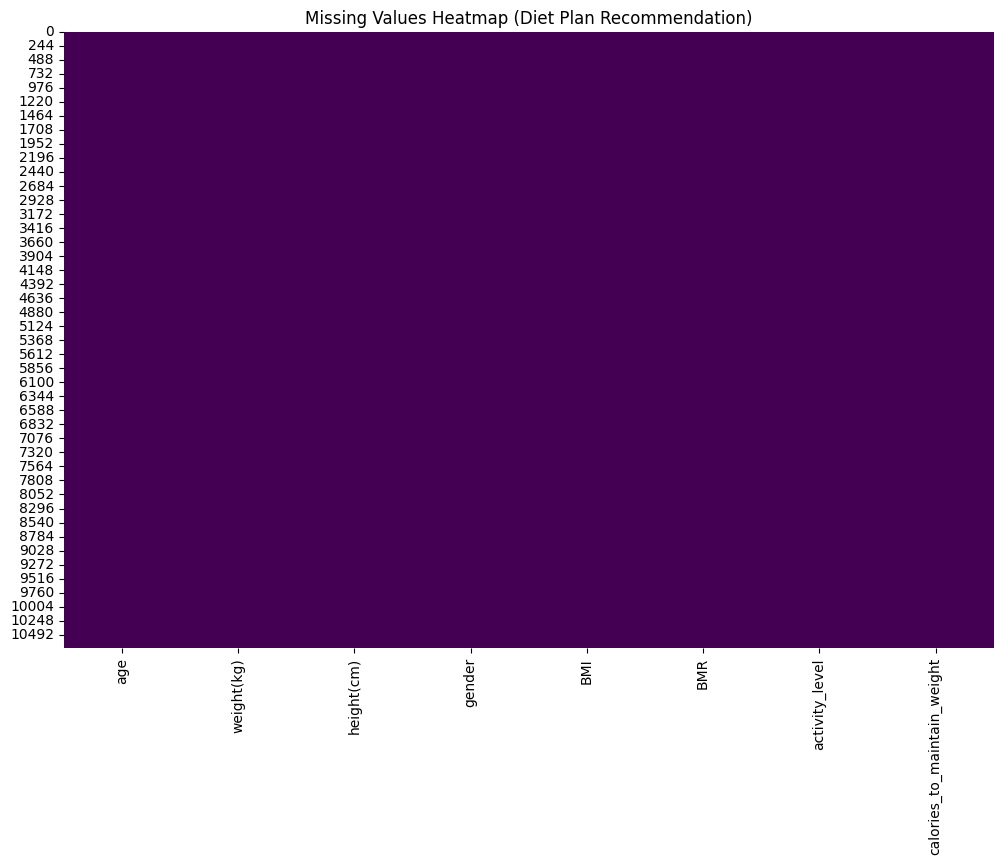

In [5]:
df_missing_values = df_cleaned.isnull().sum()
df_missing_columns = df_missing_values[df_missing_values > 0]
print("Terdapat Data Yang Hilang Sebanyak ",df_missing_columns.count(), "Kolom, Dengan Nama Kolom : ")
print(df_missing_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Diet Plan Recommendation)")
plt.show()

Terdapat Data Yang Hilang Sebanyak  0 Kolom, Dengan Nama Kolom : 
Series([], dtype: int64)


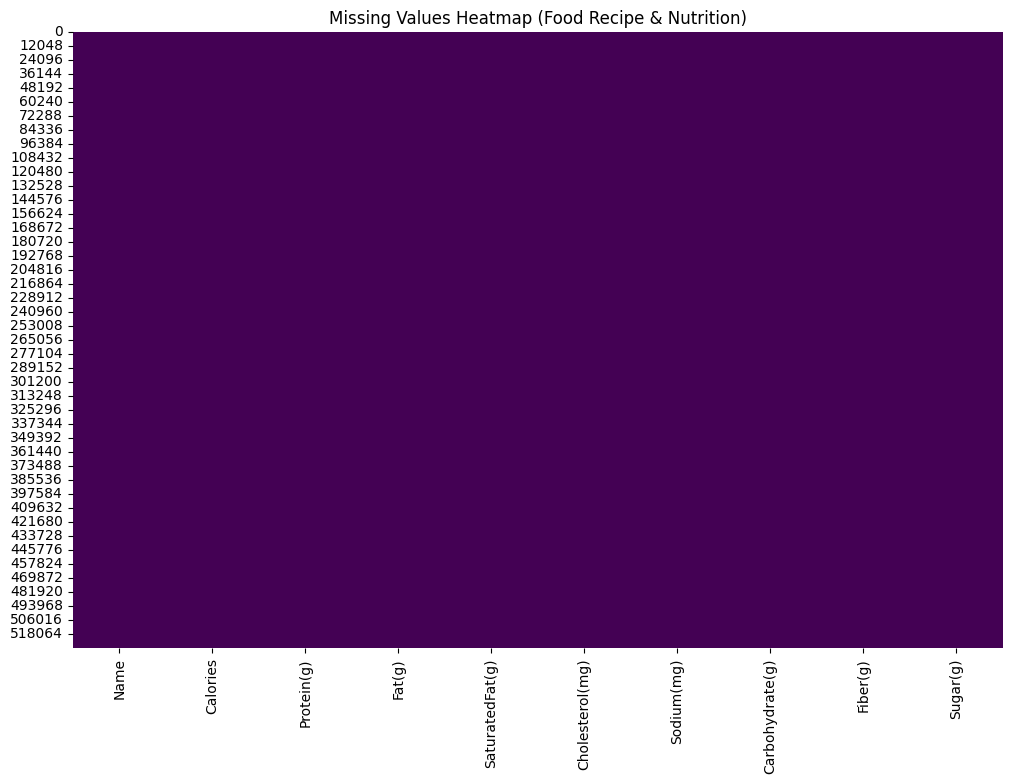

In [6]:
df_missing_values = df_combined.isnull().sum()
df_missing_columns = df_missing_values[df_missing_values > 0]
print("Terdapat Data Yang Hilang Sebanyak ",df_missing_columns.count(), "Kolom, Dengan Nama Kolom : ")
print(df_missing_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Food Recipe & Nutrition)")
plt.show()

## Model Building

### Model 1: Predict Calories to Maintain Weight

In [7]:
# Features and target variable
x1_train = df_cleaned[['age', 'height(cm)', 'weight(kg)', 'gender', 'BMI', 'BMR', 'activity_level']]
y1_train = df_cleaned['calories_to_maintain_weight']

# Normalize features
scaler1 = StandardScaler()
x1_train_scaled = scaler1.fit_transform(x1_train)

# Split data
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1_train_scaled, y1_train, test_size=0.2, random_state=42)

# Define TensorFlow model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train1.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

# Compile the model
model1.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train the model
history1 = model1.fit(X_train1, y_train1, batch_size=300, epochs=100, validation_split=0.2)

# Evaluate the model
loss1, mae1 = model1.evaluate(X_test1, y_test1)
print(f"Model 1 Loss: {loss1}, Mean Absolute Error: {mae1}")

# Evaluate and calculate R-squared score for Model 1
loss1, mae1 = model1.evaluate(X_test1, y_test1)
y_pred1 = model1.predict(X_test1)
r2_1 = r2_score(y_test1, y_pred1)
print(f"Model 1 Loss: {loss1}, Mean Absolute Error: {mae1},\nModel 1 R-squared Score: {r2_1}")

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 2115.6714 - mae: 2115.6714 - val_loss: 2113.8523 - val_mae: 2113.8523
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 2107.4114 - mae: 2107.4114 - val_loss: 2098.6887 - val_mae: 2098.6887
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 2077.7388 - mae: 2077.7388 - val_loss: 2047.1636 - val_mae: 2047.1635
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 1989.2964 - mae: 1989.2964 - val_loss: 1907.9342 - val_mae: 1907.9342
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 1773.8346 - mae: 1773.8346 - val_loss: 1597.1647 - val_mae: 1597.1648
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 1375.5851 - mae: 1375.5851 - val_loss: 1159.2426 - val_mae: 1159.2426
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 988.0881 - mae: 988.0881 - val_loss: 858.1079 - val_mae: 858.1079
E

### Model 2: Predict BMR

In [8]:
# Features and target variable
x2_train = df_cleaned[['age', 'height(cm)', 'weight(kg)', 'gender']]
y2_train = df_cleaned['BMR']

# Normalize features
scaler2 = StandardScaler()
x2_train_scaled = scaler2.fit_transform(x2_train)

# Split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2_train_scaled, y2_train, test_size=0.2, random_state=42)

# Define TensorFlow model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train2.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

# Compile the model
model2.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train the model
history2 = model2.fit(X_train2, y_train2, batch_size=300, epochs=100, validation_split=0.2)

# Evaluate and calculate R-squared score for Model 2
loss2, mae2 = model2.evaluate(X_test2, y_test2)
y_pred2 = model2.predict(X_test2)
r2_2 = r2_score(y_test2, y_pred2)
print(f"Model 2 Loss: {loss2}, Mean Absolute Error: {mae2},\nModel 2 R-squared Score: {r2_2}")

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 1442.2474 - mae: 1442.2474 - val_loss: 1441.1166 - val_mae: 1441.1166
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1438.4929 - mae: 1438.4929 - val_loss: 1433.8860 - val_mae: 1433.8860
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1424.2163 - mae: 1424.2163 - val_loss: 1408.7682 - val_mae: 1408.7682
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 1380.9163 - mae: 1380.9163 - val_loss: 1339.5806 - val_mae: 1339.5806
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 1273.1113 - mae: 1273.1113 - val_loss: 1180.5333 - val_mae: 1180.5333
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 1046.3059 - mae: 1046.3059 - val_loss: 881.7859 - val_mae: 881.7859
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 722.1735 - mae: 722.1735 - val_loss: 582.9706 - val_mae: 582.9706
Epoch

### Visualisasi Training Loss dan Validation Loss

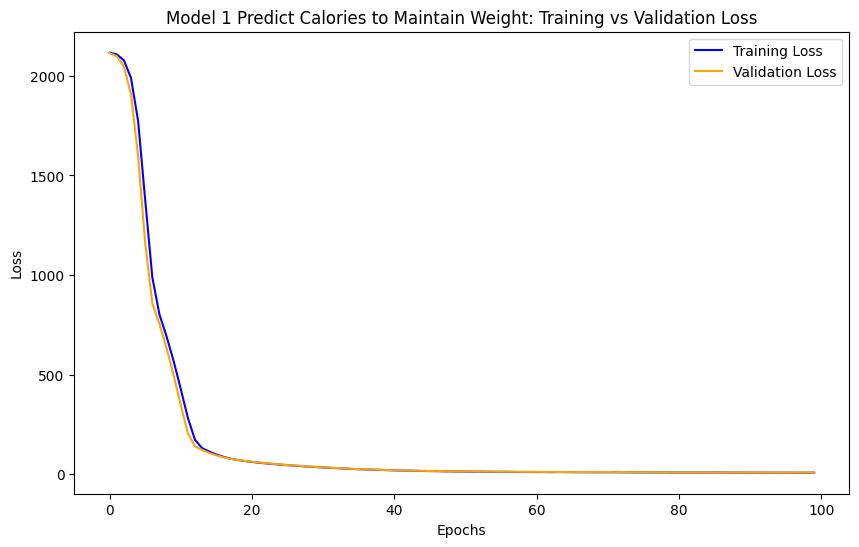

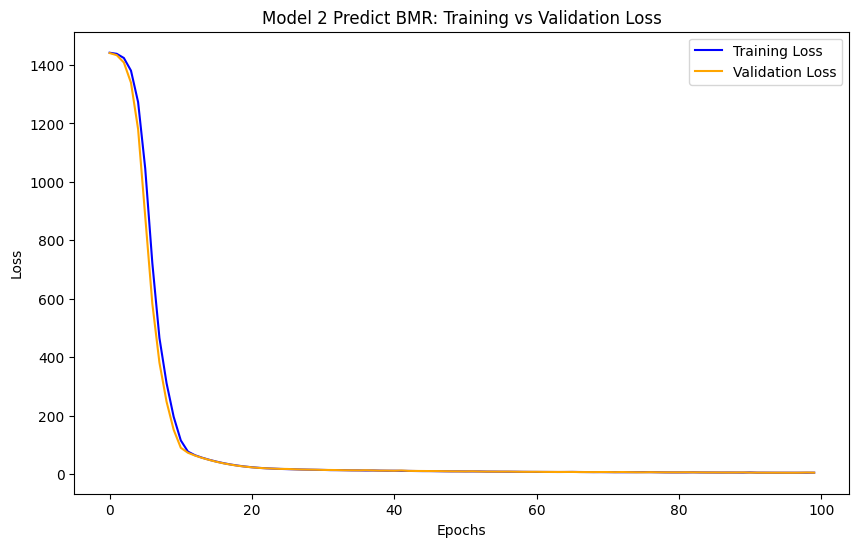

In [9]:
# Visualisasi Training Loss dan Validation Loss
def plot_training_history(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualisasi Model 1
plot_training_history(history1, 'Model 1 Predict Calories to Maintain Weight: Training vs Validation Loss')

# Visualisasi Model 2
plot_training_history(history2, 'Model 2 Predict BMR: Training vs Validation Loss')

## Function Definitions for User Input

In [10]:
def output_model(age, height, weight, gender, activity_level, food_preference, accuracy_model1, accuracy_model2):
    try:
        # Calculate BMI
        BMI = weight / ((height / 100) ** 2)

        # Predict BMR using Model 2
        BMR_input = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender]
        })
        BMR_scaled = scaler2.transform(BMR_input)
        BMR = model2.predict(BMR_scaled)[0][0]

        # Predict daily calorie needs using Model 1
        input_data = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender],
            'BMI': [BMI],
            'BMR': [BMR],
            'activity_level': [activity_level]
        })
        scaled_input1 = scaler1.transform(input_data)
        daily_calorie_needs = model1.predict(scaled_input1)[0][0]

        # Filter food preference in Dataset
        filtered_food = df_combined[df_combined['Name'].str.contains(food_preference, case=False, na=False)]

        if filtered_food.empty:
            return f"No data found for the food: {food_preference}"

        # Sort filtered food by calories in ascending order
        filtered_food = filtered_food.sort_values(by='Calories')

        # Add cumulative calories until total matches BMR
        cumulative_calories_byBMR = 0
        recommended_food_byBMR = []

        for _, row in filtered_food.iterrows():
            if cumulative_calories_byBMR + row['Calories'] <= BMR:
                recommended_food_byBMR.append(row)
                cumulative_calories_byBMR += row['Calories']
            else:
                break

        # Convert recommended food list to DataFrame Daily Calorie Needs
        recommended_food_df_byBMR = pd.DataFrame(recommended_food_byBMR)
        
        # Add cumulative calories until total matches Daily Calorie Needs
        cumulative_calories_ByDailyCalorieNeeds = 0
        recommended_food_ByDailyCalorieNeeds = []

        for _, row in filtered_food.iterrows():
            if cumulative_calories_ByDailyCalorieNeeds + row['Calories'] <= daily_calorie_needs:
                recommended_food_ByDailyCalorieNeeds.append(row)
                cumulative_calories_ByDailyCalorieNeeds += row['Calories']
            else:
                break

        # Convert recommended food list to DataFrame Daily Calorie Needs
        recommended_food_df_ByDailyCalorieNeeds = pd.DataFrame(recommended_food_ByDailyCalorieNeeds)

        return {
            "Daily Calorie Needs": daily_calorie_needs,
            "BMR": BMR,
            "Food Preference Analysis": filtered_food[['Name', 'Calories', 'Protein(g)', 
                                                       'Fat(g)', 'Carbohydrate(g)', 'Fiber(g)']],
            "Recommended Food Based on Calories By BMR": recommended_food_df_byBMR,
            "Total Calories By BMR": cumulative_calories_byBMR,
            "Recommendation Status BMR": "Calories match BMR" if cumulative_calories_byBMR == BMR else "Calories do not match BMR",
            "Recommended Food Based on Calories By Daily Calorie Needs": recommended_food_df_ByDailyCalorieNeeds,
            "Total Calories By Daily Calorie Needs": cumulative_calories_ByDailyCalorieNeeds,
            "Recommendation Status Daily Calorie Needs": "Calories match Daily Calorie Needs" if cumulative_calories_ByDailyCalorieNeeds == daily_calorie_needs else "Calories do not match Daily Calorie Needs",
            "Model1 Accuracy (Daily Calorie Needs)": accuracy_model1,
            "Model2 Accuracy (BMR)": accuracy_model2
        }

    except Exception as e:
        return f"Error: {e}"

## Test Input from User

In [11]:
def get_float_input(prompt, min_value=None, max_value=None):
    while True:
        try:
            value = float(input(prompt))
            if min_value is not None and value < min_value:
                print(f"Value must be at least {min_value}. Try again.")
                continue
            if max_value is not None and value > max_value:
                print(f"Value must not exceed {max_value}. Try again.")
                continue
            return value
        except ValueError:
            print("Invalid input. Please enter a number.")

def get_string_input(prompt):
    while True:
        value = input(prompt).strip()
        if value:
            return value
        else:
            print("Input cannot be empty. Please try again.")

# Example input from user
age = get_float_input("Enter your age: ", min_value=0)
height = get_float_input("Enter your height (in cm): ", min_value=0)
weight = get_float_input("Enter your weight (in kg): ", min_value=0)
gender = get_float_input("Enter your gender (0 for male, 1 for female): ", min_value=0, max_value=1)
activity_level = get_float_input("Enter your activity level (1-5): ", min_value=1, max_value=5)
food_preference = get_string_input("Enter your food preference: ")

# Get Results
results = output_model(age, height, weight, gender, activity_level, food_preference, r2_1, r2_2)

# Display Results
if isinstance(results, dict):
    print(f"\n--- Results ---\n")
    print(f"Daily Calorie Needs: {results['Daily Calorie Needs']:.2f}")
    print(f"BMR: {results['BMR']:.2f}")
    print("Food Preference Analysis:")
    print(results["Food Preference Analysis"])
    print("\nRecommended Food Based on Calories By BMR:")
    print(results["Recommended Food Based on Calories By BMR"])
    print(f"\nTotal Calories By BMR: {results['Total Calories By BMR']:.2f}")
    print(f"Recommendation Status By BMR: {results['Recommendation Status BMR']}")
    print(f"Model2 Accuracy (BMR): {results['Model2 Accuracy (BMR)'] * 100:.2f}%\n")
    print("\nRecommended Food Based on Calories By Daily Calorie Needs:")
    print(results["Recommended Food Based on Calories By Daily Calorie Needs"])
    print(f"\nTotal Calories By Daily Calorie Needs: {results['Total Calories By Daily Calorie Needs']:.2f}")
    print(f"Recommendation Status By Daily Calorie Needs: {results['Recommendation Status Daily Calorie Needs']}")
    print(f"Model1 Accuracy (Daily Calorie Needs): {results['Model1 Accuracy (Daily Calorie Needs)'] * 100:.2f}%")
else:
    print(results)



1/1 [==============================] - 0s 18ms/step

--- Results ---

Daily Calorie Needs: 5436.75
BMR: 1748.68
Food Preference Analysis:
                                                 Name  Calories  Protein(g)  \
69786   Charishma's Aromatic Microwave Red Beans Rice       0.0         0.0   
49767                                      Cider Rice       0.0         0.0   
287567     Salmon With Wild Rice Pilaf in Puff Pastry       0.0         0.0   
55181                       Homemade Baby Rice Cereal       0.0         0.0   
417455                      Creme Brulee Rice Pudding       0.0         0.0   
...                                               ...       ...         ...   
467916                    Yang Chow Shrimp Fried Rice    6014.6       725.0   
10447                Braised Duck with Glutinous Rice    6187.6       162.8   
117347                          Rice  Krispies Treats    6291.4       117.6   
10601                            Black Beans and Rice    9089.2       64

## Distribusi Prediksi vs Aktual

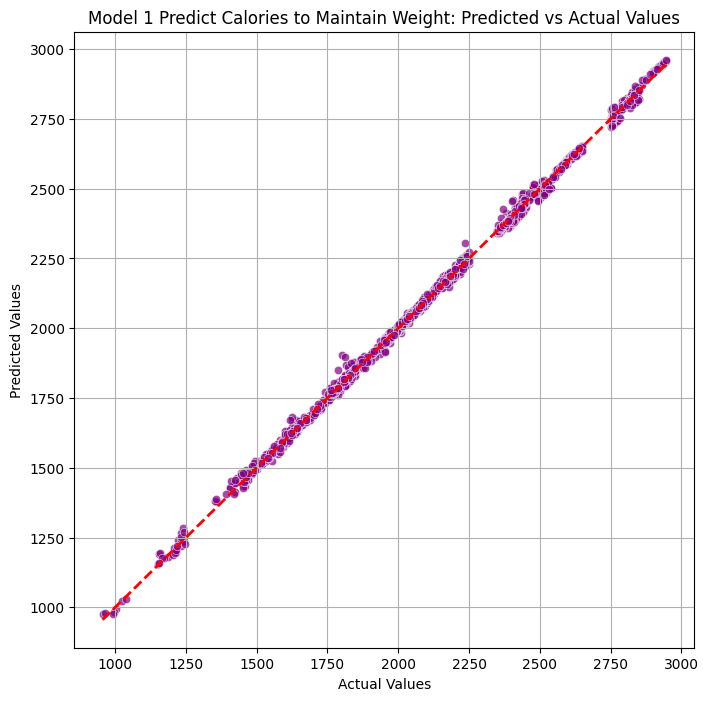

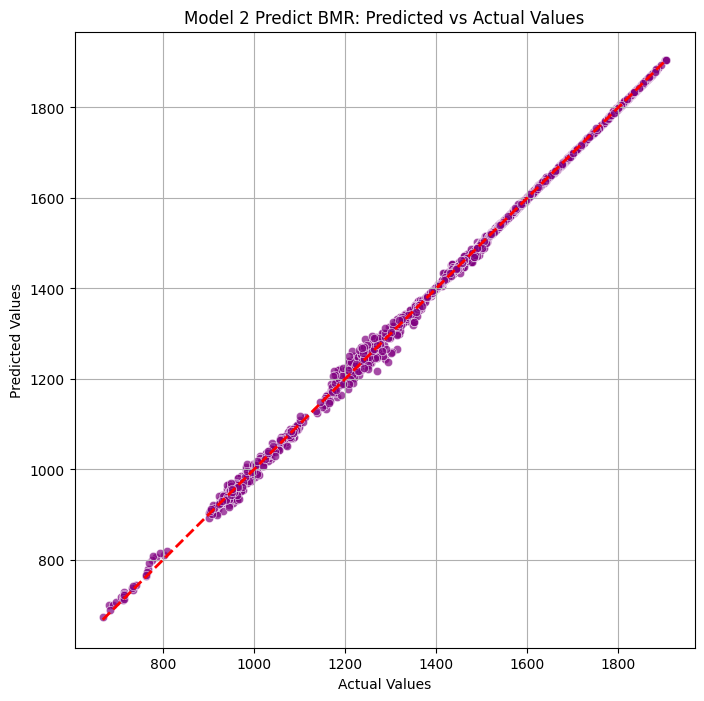

In [12]:
# Visualisasi Distribusi Prediksi vs Aktual
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7, color='purple')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualisasi Prediksi vs Aktual untuk Model 1
plot_predictions(y_test1, y_pred1.flatten(), 'Model 1 Predict Calories to Maintain Weight: Predicted vs Actual Values')

# Visualisasi Prediksi vs Aktual untuk Model 2
plot_predictions(y_test2, y_pred2.flatten(), 'Model 2 Predict BMR: Predicted vs Actual Values')

## Convert Model for Deployment

In [13]:
# Menyimpan model dalam format SavedModel
# model.save('../models/food_recommendation_model', save_format='tf')


# model.save('../models/nutrition_model.h5')
# tfjs.converters.save_keras_model(model, '../tensorflowjs/model/')
# print("Model berhasil disimpan dalam format SavedModel.")

# # Konversi model ke format TensorFlow.js
# model_path = '../tensorflowjs/model'
# tfjs.converters.save_keras_model(model, model_path)
# print(f"Model berhasil dikonversi dan disimpan di folder: {model_path}")

In [14]:
# # Konversi model SavedModel ke TFLite
# converter = tf.lite.TFLiteConverter.from_saved_model("../models/food_recommendation_model")
# tflite_model = converter.convert()

# # Simpan model TFLite ke file
# with open("../models/food_recommendation_model.tflite", "wb") as f:
#     f.write(tflite_model)
# print("Model berhasil dikonversi ke format TFLite.")

In [15]:
# # Memuat model TFLite
# interpreter = tf.lite.Interpreter(model_path="../models/food_recommendation_model.tflite")
# interpreter.allocate_tensors()

# # Mendapatkan detail dari input dan output tensor
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Contoh data input untuk prediksi
# input_data = np.expand_dims(X_test[0], axis=0).astype(np.float32)

# # Menyiapkan input tensor
# interpreter.set_tensor(input_details[0]['index'], input_data)

# # Melakukan inferensi
# interpreter.invoke()

# # Mendapatkan hasil prediksi
# tflite_predictions = interpreter.get_tensor(output_details[0]['index'])
# print(f"Hasil prediksi TFLite: {tflite_predictions}")